Problem Statement:

Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The task is to classify these images into an apparel category amongst 10 categories on which the dataset is benchmarked.

Data Preparation and Visualization:

● Load the Fashion MNIST dataset.

● Visualize different samples from the dataset.

● Normalize the pixel values of the images to be between 0 and 1 for better model performance.

● Convert the output labels to categorical format for classification.

    Import libraries

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout,ReLU
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
print(f"Number of classes   : {num_classes}")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #Load dataset

print(f"Shape of x_train    : {x_train.shape}")
print(f"Shape of y_train    : {y_train.shape}")
print(f"Shape of x_test     : {x_test.shape}")
print(f"Shape of y_test     : {y_test.shape}")
print(f"Shape of an image   : {x_train[6000].shape}")

Number of classes   : 10
Shape of x_train    : (60000, 28, 28)
Shape of y_train    : (60000,)
Shape of x_test     : (10000, 28, 28)
Shape of y_test     : (10000,)
Shape of an image   : (28, 28)


Visualize different samples from the dataset.

Input image


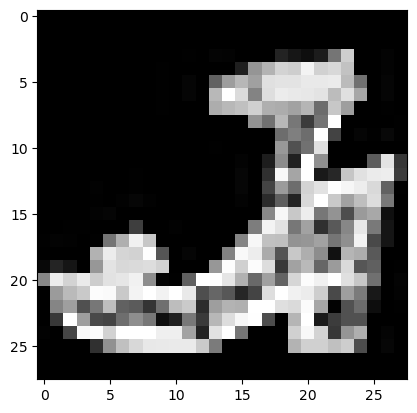

Sandal
Input image


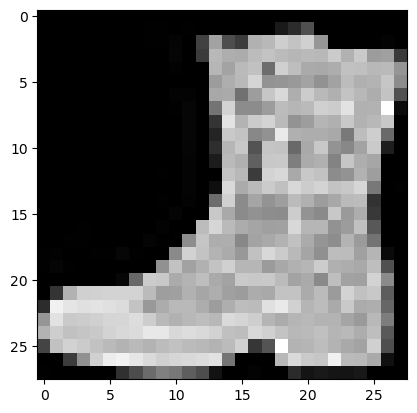

Ankle boot
Input image


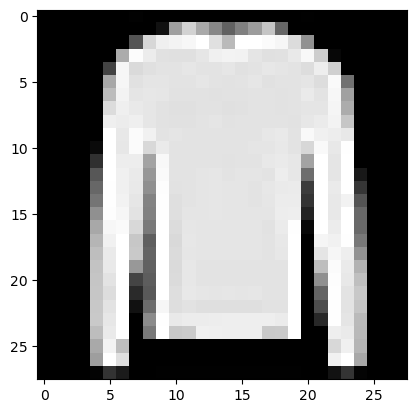

Pullover


In [3]:
print(f"Input image")
plt.imshow(x_train[60], cmap="gray") #select an image from the MNIST dataset
plt.show()
print(class_names[y_train[60]])

print(f"Input image")
plt.imshow(x_train[150], cmap="gray") #select an image from the MNIST dataset
plt.show()
print(class_names[y_train[150]])


print(f"Input image")
plt.imshow(x_train[15000], cmap="gray") #select an image from the MNIST dataset
plt.show()
print(class_names[y_train[15000]])

Normalization of image pixel values and conversion of the output labels to a one-hot encoded format.

In [4]:
# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Model Building and Training: Construct a Neural Network using TensorFlow and Keras.

● The model should consist of multiple dense layers with a significant number of neurons.

● Utilize ReLU activation for hidden layers and softmax activation for the output layer.

● Train the model on the prepared dataset.

● Implement callbacks, particularly TensorBoard, to visualize the training process.

In [5]:

# Define a deeper CNN model with padding and adjusted pooling layers
model = Sequential([
    Conv2D(32, (3, 3), activation=None, padding='same', input_shape=(28, 28, 1),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation=None, padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation=None, padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation=None, padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

    Learning Rate Scheduler and early stopping

In [6]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_callback = LearningRateScheduler(scheduler)


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Training:

Implement callbacks, particularly TensorBoard, to visualize the training process.

Track accuracy as a performance metric

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

datagen = ImageDataGenerator(rotation_range=20,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=512),epochs=100, validation_data=(x_test, y_test),callbacks=[tensorboard_callback,lr_callback,early_stopping])

#Track accuracy
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

Epoch 1/100
118/118 [==============================] - 101s 802ms/step - loss: 1.1516 - accuracy: 0.6835 - val_loss: 3.3865 - val_accuracy: 0.1738 - lr: 0.0010
Epoch 2/100
118/118 [==============================] - 97s 815ms/step - loss: 0.7763 - accuracy: 0.7832 - val_loss: 3.5146 - val_accuracy: 0.2401 - lr: 0.0010
Epoch 3/100
118/118 [==============================] - 83s 696ms/step - loss: 0.6596 - accuracy: 0.8147 - val_loss: 2.1398 - val_accuracy: 0.3544 - lr: 0.0010
Epoch 4/100
118/118 [==============================] - 82s 695ms/step - loss: 0.5964 - accuracy: 0.8325 - val_loss: 0.8447 - val_accuracy: 0.7193 - lr: 0.0010
Epoch 5/100
118/118 [==============================] - 83s 700ms/step - loss: 0.5562 - accuracy: 0.8411 - val_loss: 0.7809 - val_accuracy: 0.7628 - lr: 0.0010
Epoch 6/100
118/118 [==============================] - 102s 861ms/step - loss: 0.5308 - accuracy: 0.8466 - val_loss: 0.6345 - val_accuracy: 0.7923 - lr: 0.0010
Epoch 7/100
118/118 [=======================

Implement callbacks, particularly TensorBoard, to visualize the training process.

In [8]:
#!pip install tensorboard
#%load_ext tensorboard

%reload_ext tensorboard
#start TensorBoard
%tensorboard --logdir logs/fit --port=6008

#http://localhost:6006/

Reusing TensorBoard on port 6008 (pid 1628), started 1:03:03 ago. (Use '!kill 1628' to kill it.)

Model Evaluation and Analysis:

● Evaluate the model's performance using a validation set.

● Analyze the training process with the help of TensorBoard.

● Save the trained model, including its architecture and learned weights.

In [9]:
# Evaluate the model
from keras.models import load_model 
import h5py

model.save("fashion_mnist_post_modeling.keras") 
fashion_mnist_model = load_model("fashion_mnist_post_modeling.keras") 
#loss, accuracy = loaded_model.evaluate(test_data, test_targets) 

test_loss, test_accuracy = fashion_mnist_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
model.summary()

313/313 [==============================] - 5s 13ms/step - loss: 0.2922 - accuracy: 0.9151
Test accuracy: 0.9151
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
          

In [10]:
preds = model.predict(x_test)
preds_class = np.argmax(preds, axis=1)

print(f"Shape of preds: {preds.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of preds_class: {preds_class.shape}")

313/313 [==============================] - 5s 13ms/step
Shape of preds: (10000, 10)
Shape of y_test: (10000,)
Shape of preds_class: (10000,)


Analysis:

Analyze the results, understand the model's performance, and explore ways to improve it if necessary.

Peformance Evaluation:

Assess the model’s performance using both training and validation datasets.

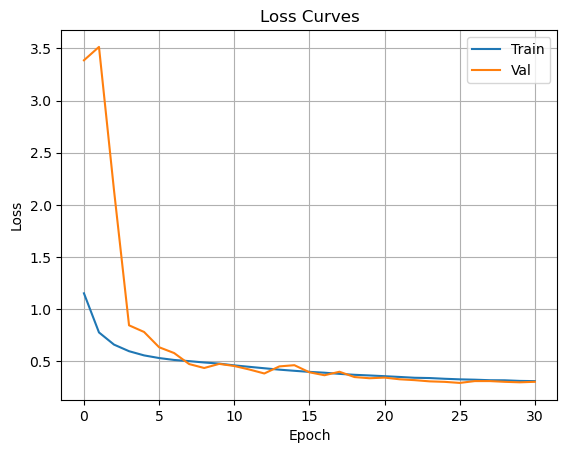

In [11]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

Visualize the training and validation loss and accuracy to identify any signs of overfitting or underfitting.

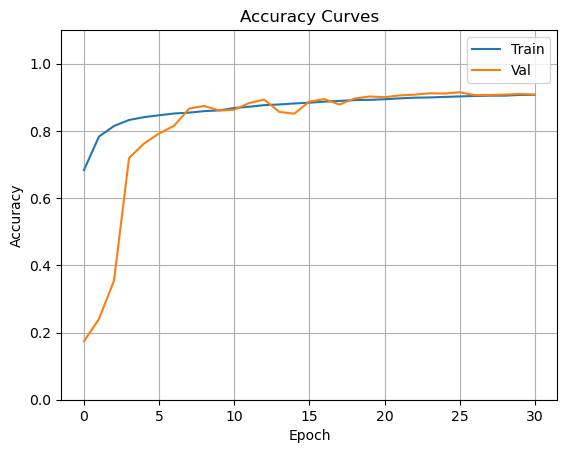

In [12]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.title("Accuracy Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

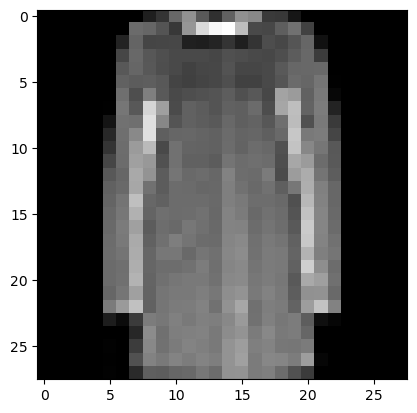

Coat


In [13]:
plt.imshow(x_test[150].reshape(28,28), cmap="gray")
plt.show()
print(class_names[y_test[150]])

In [14]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.86      0.88      1000
           3       0.92      0.91      0.91      1000
           4       0.86      0.86      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.72      0.79      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [15]:
print(confusion_matrix(y_test, preds_class))

[[856   0  12  14   3   0 108   0   7   0]
 [  1 987   0   8   0   0   3   0   1   0]
 [ 15   0 858   6  49   0  72   0   0   0]
 [ 11   7   6 905  22   1  45   0   3   0]
 [  0   1  34  33 858   0  73   0   1   0]
 [  0   0   0   0   0 982   0  15   0   3]
 [ 85   2  40  19  64   0 785   0   5   0]
 [  0   0   0   0   0   4   0 985   0  11]
 [  1   0   0   4   0   2   1   2 989   1]
 [  0   0   0   0   0   5   1  48   0 946]]


In [16]:
# Required to save models in HDF5 format
#!pip install pyyaml h5py
#!pip uninstall h5py
#!pip install h5py --no-cache-dir

#print(tf.version.VERSION)

In [17]:
#!python --version
#!pip show h5py
